<a href="https://colab.research.google.com/github/SohamVaidya12/Automated-Plant-Species-Identification-System/blob/main/Plant_A_speciesdetect_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
input_shape = (256, 256, 3)
num_classes = 10

In [ ]:
batch_size = 32
epochs = 150

In [ ]:
data = []
labels = []
temp_label = []
main_folder_path = '/content/drive/MyDrive/Plant species'
for i, folder_name in enumerate(os.listdir(main_folder_path)):
    folder_path = os.path.join(main_folder_path, folder_name)
    temp_label.append([i,folder_name])
    print(i,folder_name)
    for img_name in os.listdir(folder_path):
        #print(img_name)
        img_path = os.path.join(folder_path, img_name)
        img = tf.keras.preprocessing.image.load_img(
            img_path, target_size=input_shape[:2])
        img_arr = tf.keras.preprocessing.image.img_to_array(img)
        data.append(img_arr)
        labels.append(i)


0 Charuka1
1 Mangifera Indica
2 Banbusa vulgaris
3 Ficus Religiosa
4 Crinam
5 Jasminium sabac
6 Plumeria
7 Dracena
8 american pie
9 Singapoor desy4


In [ ]:
temp_label

[[0, 'Charuka1'],
 [1, 'Mangifera Indica'],
 [2, 'Banbusa vulgaris'],
 [3, 'Ficus Religiosa'],
 [4, 'Crinam'],
 [5, 'Jasminium sabac'],
 [6, 'Plumeria'],
 [7, 'Dracena'],
 [8, 'american pie'],
 [9, 'Singapoor desy4']]

In [ ]:
train_data, val_data, train_labels, val_labels = train_test_split(
    data, labels, test_size=0.2, random_state=42)


In [ ]:
import numpy as np

In [ ]:
train_data = tf.keras.utils.normalize(np.array(train_data), axis=1)
val_data = tf.keras.utils.normalize(np.array(val_data), axis=1)


In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

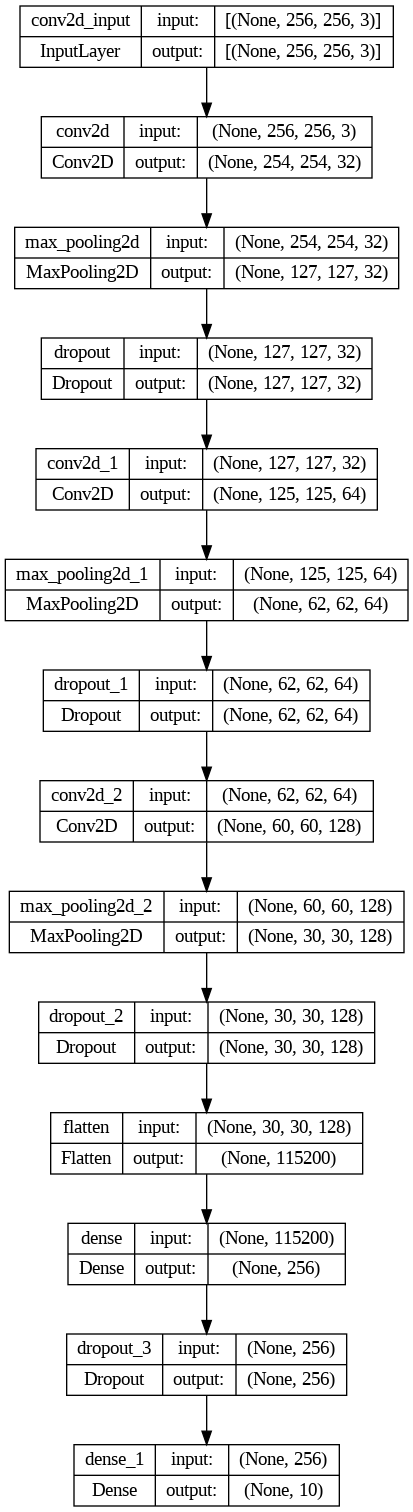

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(
    train_data,
    train_labels,
    validation_data=(val_data, val_labels),
    batch_size=batch_size,
    epochs=epochs)

Epoch 1/150
7/7 [==============================] - 16s 412ms/step - loss: 2.5225 - accuracy: 0.1142 - val_loss: 2.2984 - val_accuracy: 0.3455
Epoch 2/150
7/7 [==============================] - 1s 130ms/step - loss: 2.2570 - accuracy: 0.2009 - val_loss: 2.2427 - val_accuracy: 0.1455
Epoch 3/150
7/7 [==============================] - 1s 126ms/step - loss: 2.0501 - accuracy: 0.3151 - val_loss: 1.9580 - val_accuracy: 0.5273
Epoch 4/150
7/7 [==============================] - 1s 126ms/step - loss: 1.6474 - accuracy: 0.4977 - val_loss: 1.3096 - val_accuracy: 0.8364
Epoch 5/150
7/7 [==============================] - 1s 127ms/step - loss: 0.9338 - accuracy: 0.7123 - val_loss: 0.7623 - val_accuracy: 0.8727
Epoch 6/150
7/7 [==============================] - 1s 142ms/step - loss: 0.7502 - accuracy: 0.7854 - val_loss: 0.5525 - val_accuracy: 0.8545
Epoch 7/150
7/7 [==============================] - 1s 130ms/step - loss: 0.4703 - accuracy: 0.8539 - val_loss: 0.4477 - val_accuracy: 0.8545
Epoch 8/150


In [ ]:
model.save('leaf_classifier_model.h5')

In [ ]:
temp_label

[[0, 'Charuka1'],
 [1, 'Mangifera Indica'],
 [2, 'Banbusa vulgaris'],
 [3, 'Ficus Religiosa'],
 [4, 'Crinam'],
 [5, 'Jasminium sabac'],
 [6, 'Plumeria'],
 [7, 'Dracena'],
 [8, 'american pie'],
 [9, 'Singapoor desy4']]

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('leaf_classifier_model.h5')

# Load an example image to classify
img = load_img('/content/drive/MyDrive/Plant species/Charuka1/charuka (1).jpeg', target_size=(256, 256))
img_arr = img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = tf.keras.utils.normalize(img_arr, axis=1)

# Use the model to predict the class of the image
predictions = model.predict(img_arr)
predicted_class = np.argmax(predictions)

print('Predicted class:', predicted_class)

1/1 [==============================] - 0s 249ms/step
Predicted class: 0


In [ ]:
# Load the test dataset
test_data = [...]  # load your test data here
test_labels = [...]  # load your test labels here

# Convert the data to numpy arrays and normalize it
test_data = tf.keras.utils.normalize(np.array(val_data), axis=1)

# Convert the labels to categorical one-hot encoding
test_labels = tf.keras.utils.to_categorical(val_labels, num_classes)

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(val_data, val_labels)

#print('Test loss:', loss)
print('Test accuracy:', accuracy)


2/2 [==============================] - 0s 33ms/step - loss: 0.7034 - accuracy: 0.9091
Test accuracy: 0.9090909361839294


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [ ]:
plot_model(model, to_file='leaf_classifier_model.h5', show_shapes=True, show_layer_names=True)


NameError: ignored

In [ ]:
data = []
labels = []
for i in range(num_classes):
    folder_path = '/content/drive/MyDrive/Plant species' + str(i)
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(
            img_path, target_size=input_shape[:2])
        img_arr = tf.keras.preprocessing.image.img_to_array(img)
        data.append(img_arr)
        labels.append(i)

In [ ]:
train_data, val_data, train_labels, val_labels = train_test_split(
    data, labels, test_size=0.2, random_state=42)
